In [4]:
%run "..\..\Startup_py3.py"
sys.path.append(r"..\..\..\..\Documents")

import ImageAnalysis3 as ia
%matplotlib notebook

from ImageAnalysis3 import *
print(os.getpid())

import h5py
from ImageAnalysis3.classes import _allowed_kwds
import ast

19492


In [5]:
from ImageAnalysis3 import _distance_zxy
from ImageAnalysis3.figure_tools.color import transparent_gradient
from ImageAnalysis3.figure_tools import _dpi,_single_col_width,_double_col_width,_single_row_height,_ref_bar_length, _ticklabel_size,_ticklabel_width,_font_size
_color_dict={
    'A':[1.,0.,0.],
    'B':[0.,0.,1.],
}
# 3d plotting
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import ListedColormap,LinearSegmentedColormap
from mpl_toolkits.mplot3d import Axes3D
from skimage.measure import marching_cubes # 3d cloud calculation


In [6]:
import matplotlib
import matplotlib.pyplot as plt
plt.rc('font', family='serif')
plt.rc('font', serif='Arial')
plt.style.use('dark_background')

matplotlib.rcParams['pdf.fonttype'] = 42


# Load chromosome zxy dict

In [7]:
zxys_dict = np.load(r'\\crick\SSD_0\Shiwei\DNA_MERFISH_analysis\20220402plus0316_MERFISH\0402plus0316_class_2_chr_zxys_n35016.pkl',
                    allow_pickle=True)

In [8]:
for _dict in zxys_dict['Astro']:
    print(len(_dict))

20
20
20
20
6
20
12
13
19
20
16
19
20
17
20
10
20
20
9
19
13
20
8
17
11
20
13
20
9
14
11
20
15
20
20
11
16
20
9
8
20
19
13
20
20
19
19
20
20
20
20
20
19
15
20
20
20
19
20
20
20
20
20
20
20
20
20
18
14
20
18
20
19
10
19
19
17
20
20
20
20
20
17
18
11
14
20
9
18
19
19
20
15
14
14
20
20
20
16
19
9
19
20
20
20
20
19
20
12
20
20
20
19
18
16
20
20
20
14
20
20
20
15
20
20
20
20
20
20
20
19
20
20
20
19
20
19
20
16
20
16
20
19
19
20
20
20
20
12
20
20
20
19
20
20
20
20
20
19
9
20
20
20
20
20
19
20
20
20
19
17
20
19
19
20
19
10
16
15
19
20
20
20
20
20
20
20
20
20
20
20
17
20
20
20
20
20
20
20
20
20
20
20
20
20
18
20
20
19
20
20
7
19
20
20
19
20
20
20
18
20
20
20
20
20
20
20
20
20
20
18
20
20
14
20
20
15
14
19
20
14
20
10
20
8
20
19
20
17
14
15
19
20
12
20
20
17
19
20
7
20
20
12
20
20
20
20
20
7
13
20
19
11
18
8
18
17
3
6
20
20
20
20
20
20
20
20
14
6
20
20
20
20
14
6
20
20
19
20
20
20
20
20
20
20
14
20
20
20
16
6
20
20
20
19
18
20
13
14
18
14
20
20
20
20
20
20
20
20
20
17
20
15
20
19
8
20
19
20
20


In [9]:
figure_width = _double_col_width
figure_dpi=100
background_color = [0,0,0]



In [10]:
from ImageAnalysis3.structure_tools.distance import sort_mouse_chr
reload(structure_tools.distance)

<module 'ImageAnalysis3.structure_tools.distance' from 'E:\\Users\\puzheng\\Documents\\ImageAnalysis3\\structure_tools\\distance.py'>

In [11]:
cmap = copy.copy(cm.Spectral)
chr_2_color = {_key:cmap((sort_mouse_chr(_key)-1)/20) for _key in sorted(_dict.keys(), key = lambda v:sort_mouse_chr(v))}

In [12]:
def Centering_Chr2ZxysListDict(chr_2_zxys_list):
    # center
    
    _all_zxys = []
    for _zxys_list in chr_2_zxys_list.values():
        _all_zxys.extend(list(_zxys_list))
    _center = np.nanmean(np.concatenate(_all_zxys), axis=0)
    _centered_dict = {}
    for _chr, _zxys_list in chr_2_zxys_list.items():
        _centered_dict[_chr] = _zxys_list - _center[np.newaxis,:]
        
    return _centered_dict


In [13]:
figure_folder = r'D:\20220611-Plots'
decoded_figure_folder = os.path.join(figure_folder, 'Decoded_3D')
if not os.path.exists(decoded_figure_folder):
    os.makedirs(decoded_figure_folder)

<IPython.core.display.Javascript object>


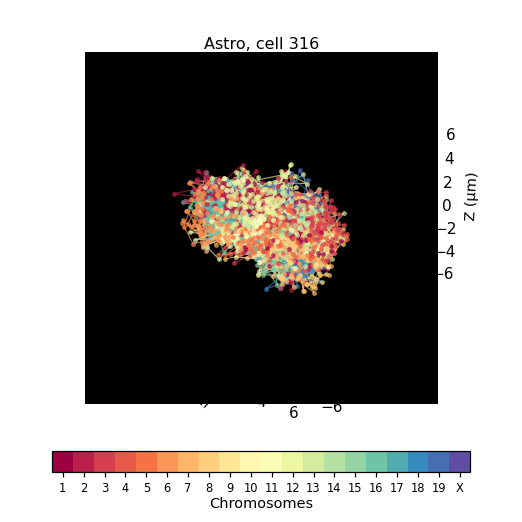

In [14]:
# select cell
#plt.style.use('dark_background')
plt.style.use('default')

_cell_type = 'Astro'
_cell_ind = 316
_dict = zxys_dict[_cell_type][_cell_ind]


from matplotlib import animation
plot_animation = False
angle = 3

_centered_dict = Centering_Chr2ZxysListDict(_dict)
plot_radius = 6

marker_size = 10
marker_alpha = 0.7

depthshade=False
fig = plt.figure(figsize=(figure_width, figure_width), dpi=figure_dpi)

ax3d = fig.add_subplot(111, projection='3d')
ax3d.set_facecolor(background_color)
fig.subplots_adjust(left=0, right=1, bottom=0, top=0.9)
# turn off grid if needed
ax3d.grid(False)
ax3d.xaxis.set_pane_color((0.0, 0.0, 0.0, 0.0))
ax3d.yaxis.set_pane_color((0.0, 0.0, 0.0, 0.0))
ax3d.zaxis.set_pane_color((0.0, 0.0, 0.0, 0.0))
# scatter plot
for _chr in sorted(_centered_dict.keys(), key = lambda v:sort_mouse_chr(v)):
    _zxys_list = _centered_dict[_chr]/1000
    for _zxys in _zxys_list:
        #print(_chr)
        _valid_inds = (np.isnan(_zxys).sum(1) == 0)
        _sc = ax3d.scatter(_zxys[_valid_inds,1], _zxys[_valid_inds,2], _zxys[_valid_inds,0],
                           color=chr_2_color[_chr], 
                           s=marker_size, depthshade=depthshade, 
                           alpha=marker_alpha,
                           #edgecolors=_edge_colors, 
                           linewidth=0, label=f"{_chr}")
        _ln = ax3d.plot(_zxys[_valid_inds,1], _zxys[_valid_inds,2], _zxys[_valid_inds,0],
                        color=chr_2_color[_chr], linewidth=0.75, alpha=marker_alpha)
# axes limits
ax3d.axes.set_xlim3d(left=-plot_radius, right=plot_radius) 
ax3d.axes.set_ylim3d(bottom=-plot_radius, top=plot_radius) 
ax3d.axes.set_zlim3d(bottom=-plot_radius, top=plot_radius) 
# axes ticks
ax3d.set_xticks(np.arange(-plot_radius,plot_radius+1, 2))
ax3d.set_yticks(np.arange(-plot_radius,plot_radius+1, 2))
ax3d.set_zticks(np.arange(-plot_radius,plot_radius+1, 2))
# axes labels
ax3d.set_xlabel(f"X (\u03BCm)", fontsize=_font_size+2, labelpad=1)
ax3d.set_ylabel(f"Y (\u03BCm)", fontsize=_font_size+2, labelpad=1)
ax3d.set_zlabel(f"Z (\u03BCm)", fontsize=_font_size+2, labelpad=1)
# title
ax3d.set_title(f"{_cell_type}, cell {_cell_ind}" ,fontsize=_font_size+3, pad=0)
# colorbar
bounds = [sort_mouse_chr(_chr) for _chr in _centered_dict.keys()]
bounds.append(np.max(bounds)+1)
bounds = np.sort(bounds)
norm = matplotlib.colors.BoundaryNorm(bounds, cmap.N)
cbar_shrink = 0.8
m = cm.ScalarMappable(cmap=cmap, norm=norm)
cbar = plt.colorbar(m, ax=ax3d, orientation='horizontal', pad=0.1, 
                    ticks=bounds[:-1]+0.5,
                    boundaries=bounds,
                    shrink=cbar_shrink)
cbar.set_label('Chromosomes', fontsize=_font_size+2, labelpad=1,)
cbar.ax.set_xticklabels(list(sorted(_dict.keys(), key = lambda v:sort_mouse_chr(v))), fontsize=_font_size)
# animation
if plot_animation:
    def rotate3D(angle):
         ax3d.view_init(azim=angle)
    ani = animation.FuncAnimation(fig, rotate3D, frames=np.arange(0, 360*2, angle), interval=50)
    ani.save(os.path.join(decoded_figure_folder, f"Decode3D_type_{_cell_type.replace(' ', '_').replace(r'/', '-')}_ind_{_cell_ind}.gif"), 
             writer=animation.PillowWriter(fps=30), )
else:
    # save pdf and png
    fig.savefig(os.path.join(decoded_figure_folder, f"Decode3D_type_{_cell_type.replace(' ', '_').replace(r'/', '-')}_ind_{_cell_ind}.pdf"),
                transparent=True)
    fig.savefig(os.path.join(decoded_figure_folder, f"Decode3D_type_{_cell_type.replace(' ', '_').replace(r'/', '-')}_ind_{_cell_ind}.png"),
                transparent=True)
fig.show()

<IPython.core.display.Javascript object>


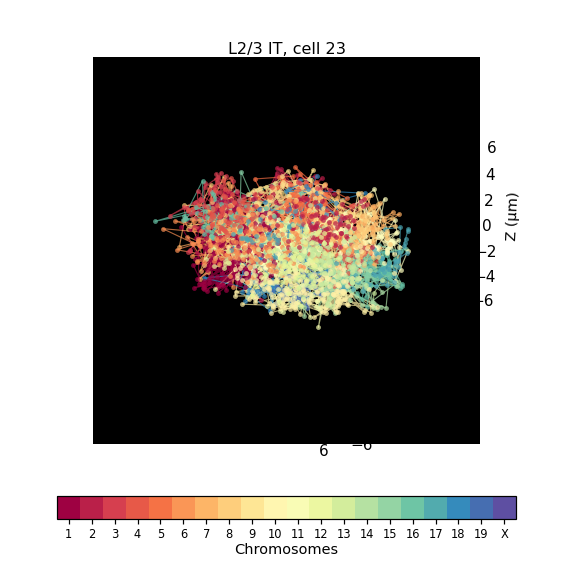

In [15]:
# select cell
#plt.style.use('dark_background')
plt.style.use('default')

_cell_type = 'L2/3 IT'
_cell_ind = 23
_dict = zxys_dict[_cell_type][_cell_ind]


from matplotlib import animation
plot_animation = False
angle = 3

_centered_dict = Centering_Chr2ZxysListDict(_dict)
plot_radius = 6

marker_size = 10
marker_alpha = 0.7

depthshade=False
fig = plt.figure(figsize=(figure_width, figure_width), dpi=figure_dpi)
ax3d = fig.add_subplot(111, projection='3d')
ax3d.set_facecolor(background_color)
fig.subplots_adjust(left=0, right=1, bottom=0, top=0.9)
# turn off grid if needed
ax3d.grid(False)
ax3d.xaxis.set_pane_color((0.0, 0.0, 0.0, 0.0))
ax3d.yaxis.set_pane_color((0.0, 0.0, 0.0, 0.0))
ax3d.zaxis.set_pane_color((0.0, 0.0, 0.0, 0.0))
# scatter plot
for _chr in sorted(_centered_dict.keys(), key = lambda v:sort_mouse_chr(v)):
    _zxys_list = _centered_dict[_chr]/1000
    for _zxys in _zxys_list:
        #print(_chr)
        _valid_inds = (np.isnan(_zxys).sum(1) == 0)
        _sc = ax3d.scatter(_zxys[_valid_inds,1], _zxys[_valid_inds,2], _zxys[_valid_inds,0],
                           color=chr_2_color[_chr], 
                           s=marker_size, depthshade=depthshade, 
                           alpha=marker_alpha,
                           #edgecolors=_edge_colors, 
                           linewidth=0, label=f"_chr")
        _ln = ax3d.plot(_zxys[_valid_inds,1], _zxys[_valid_inds,2], _zxys[_valid_inds,0],
                        color=chr_2_color[_chr], linewidth=0.75, alpha=marker_alpha)
# axes limits
ax3d.axes.set_xlim3d(left=-plot_radius, right=plot_radius) 
ax3d.axes.set_ylim3d(bottom=-plot_radius, top=plot_radius) 
ax3d.axes.set_zlim3d(bottom=-plot_radius, top=plot_radius) 
# axes ticks
ax3d.set_xticks(np.arange(-plot_radius,plot_radius+1, 2))
ax3d.set_yticks(np.arange(-plot_radius,plot_radius+1, 2))
ax3d.set_zticks(np.arange(-plot_radius,plot_radius+1, 2))
# axes labels
ax3d.set_xlabel(f"X (\u03BCm)", fontsize=_font_size+2, labelpad=1)
ax3d.set_ylabel(f"Y (\u03BCm)", fontsize=_font_size+2, labelpad=1)
ax3d.set_zlabel(f"Z (\u03BCm)", fontsize=_font_size+2, labelpad=1)
# title
ax3d.set_title(f"{_cell_type}, cell {_cell_ind}" ,fontsize=_font_size+3, pad=0)
# colorbar
bounds = [sort_mouse_chr(_chr) for _chr in _centered_dict.keys()]
bounds.append(np.max(bounds)+1)
bounds = np.sort(bounds)
norm = matplotlib.colors.BoundaryNorm(bounds, cmap.N)
cbar_shrink = 0.8
m = cm.ScalarMappable(cmap=cmap, norm=norm)
cbar = plt.colorbar(m, ax=ax3d, orientation='horizontal', pad=0.1, 
                    ticks=bounds[:-1]+0.5,
                    boundaries=bounds,
                    shrink=cbar_shrink)
cbar.set_label('Chromosomes', fontsize=_font_size+2, labelpad=1,)
cbar.ax.set_xticklabels(list(sorted(_dict.keys(), key = lambda v:sort_mouse_chr(v))), fontsize=_font_size)
# animation
if plot_animation:
    def rotate3D(angle):
         ax3d.view_init(azim=angle)
    ani = animation.FuncAnimation(fig, rotate3D, frames=np.arange(0, 360*2, angle), interval=50)
    ani.save(os.path.join(decoded_figure_folder, f"Decode3D_type_{_cell_type.replace(' ', '_').replace(r'/', '-')}_ind_{_cell_ind}.gif"), 
             writer=animation.PillowWriter(fps=30), )
else:
    # save pdf and png
    fig.savefig(os.path.join(decoded_figure_folder, f"Decode3D_type_{_cell_type.replace(' ', '_').replace(r'/', '-')}_ind_{_cell_ind}.pdf"),
                transparent=True)
    fig.savefig(os.path.join(decoded_figure_folder, f"Decode3D_type_{_cell_type.replace(' ', '_').replace(r'/', '-')}_ind_{_cell_ind}.png"),
                transparent=True)
fig.show()

<IPython.core.display.Javascript object>


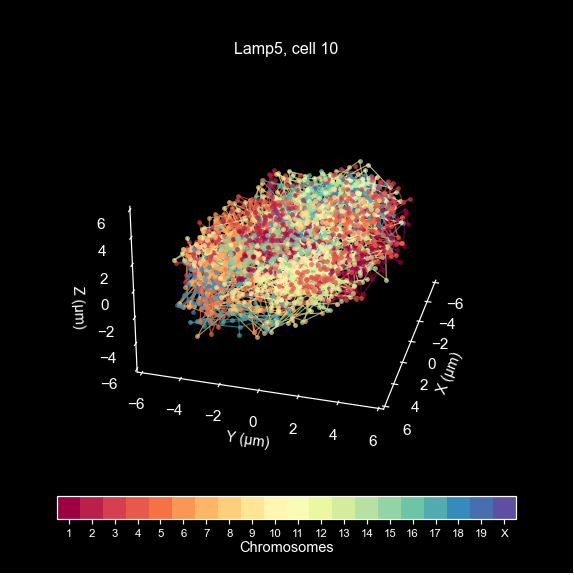

In [270]:
# select cell

_cell_type = 'Lamp5'
_cell_ind = 10
_dict = zxys_dict[_cell_type][_cell_ind]


from matplotlib import animation
plot_animation = False
angle = 3

_centered_dict = Centering_Chr2ZxysListDict(_dict)
plot_radius = 6

marker_size = 10
marker_alpha = 0.7

depthshade=False
fig = plt.figure(figsize=(figure_width, figure_width), dpi=figure_dpi)
ax3d = fig.add_subplot(111, projection='3d')
ax3d.set_facecolor(background_color)
fig.subplots_adjust(left=0, right=1, bottom=0, top=0.9)
# turn off grid if needed
ax3d.grid(False)
ax3d.xaxis.set_pane_color((0.0, 0.0, 0.0, 0.0))
ax3d.yaxis.set_pane_color((0.0, 0.0, 0.0, 0.0))
ax3d.zaxis.set_pane_color((0.0, 0.0, 0.0, 0.0))
# scatter plot
for _chr in sorted(_centered_dict.keys(), key = lambda v:sort_mouse_chr(v)):
    _zxys_list = _centered_dict[_chr]/1000
    for _zxys in _zxys_list:
        #print(_chr)
        _valid_inds = (np.isnan(_zxys).sum(1) == 0)
        _sc = ax3d.scatter(_zxys[_valid_inds,1], _zxys[_valid_inds,2], _zxys[_valid_inds,0],
                           color=chr_2_color[_chr], 
                           s=marker_size, depthshade=depthshade, 
                           alpha=marker_alpha,
                           #edgecolors=_edge_colors, 
                           linewidth=0, label=f"_chr")
        _ln = ax3d.plot(_zxys[_valid_inds,1], _zxys[_valid_inds,2], _zxys[_valid_inds,0],
                        color=chr_2_color[_chr], linewidth=0.75, alpha=marker_alpha)
# axes limits
ax3d.axes.set_xlim3d(left=-plot_radius, right=plot_radius) 
ax3d.axes.set_ylim3d(bottom=-plot_radius, top=plot_radius) 
ax3d.axes.set_zlim3d(bottom=-plot_radius, top=plot_radius) 
# axes ticks
ax3d.set_xticks(np.arange(-plot_radius,plot_radius+1, 2))
ax3d.set_yticks(np.arange(-plot_radius,plot_radius+1, 2))
ax3d.set_zticks(np.arange(-plot_radius,plot_radius+1, 2))
# axes labels
ax3d.set_xlabel(f"X (\u03BCm)", fontsize=_font_size+2, labelpad=1)
ax3d.set_ylabel(f"Y (\u03BCm)", fontsize=_font_size+2, labelpad=1)
ax3d.set_zlabel(f"Z (\u03BCm)", fontsize=_font_size+2, labelpad=1)
# title
ax3d.set_title(f"{_cell_type}, cell {_cell_ind}" ,fontsize=_font_size+3, pad=0)
# colorbar
bounds = [sort_mouse_chr(_chr) for _chr in _centered_dict.keys()]
bounds.append(np.max(bounds)+1)
bounds = np.sort(bounds)
norm = matplotlib.colors.BoundaryNorm(bounds, cmap.N)
cbar_shrink = 0.8
m = cm.ScalarMappable(cmap=cmap, norm=norm)
cbar = plt.colorbar(m, ax=ax3d, orientation='horizontal', pad=0.1, 
                    ticks=bounds[:-1]+0.5,
                    boundaries=bounds,
                    shrink=cbar_shrink)
cbar.set_label('Chromosomes', fontsize=_font_size+2, labelpad=1,)
cbar.ax.set_xticklabels(list(sorted(_dict.keys(), key = lambda v:sort_mouse_chr(v))), fontsize=_font_size)
# animation
if plot_animation:
    def rotate3D(angle):
         ax3d.view_init(azim=angle)
    ani = animation.FuncAnimation(fig, rotate3D, frames=np.arange(0, 360*2, angle), interval=50)
    ani.save(os.path.join(decoded_figure_folder, f"Decode3D_type_{_cell_type.replace(' ', '_').replace(r'/', '-')}_ind_{_cell_ind}.gif"), 
             writer=animation.PillowWriter(fps=30), )
else:
    # save pdf and png
    fig.savefig(os.path.join(decoded_figure_folder, f"Decode3D_type_{_cell_type.replace(' ', '_').replace(r'/', '-')}_ind_{_cell_ind}.pdf"),
                transparent=True)
    fig.savefig(os.path.join(decoded_figure_folder, f"Decode3D_type_{_cell_type.replace(' ', '_').replace(r'/', '-')}_ind_{_cell_ind}.png"),
                transparent=True)
fig.show()

<IPython.core.display.Javascript object>


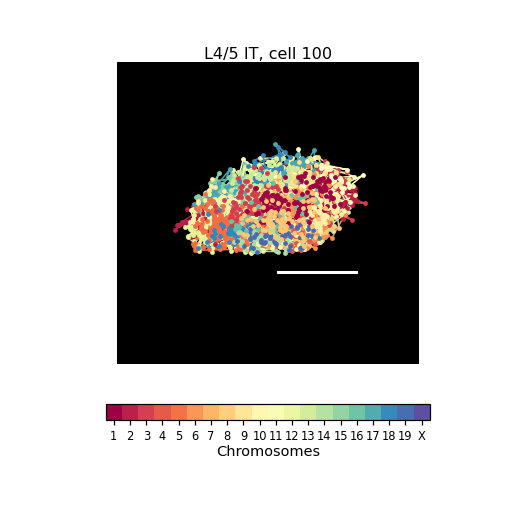

In [32]:
# select cell

#plt.style.use('dark_background')
plt.style.use('default')

_cell_type = 'L4/5 IT'
_cell_ind = 100
_dict = zxys_dict[_cell_type][_cell_ind]


from matplotlib import animation
plot_animation = False
angle = 3

_centered_dict = Centering_Chr2ZxysListDict(_dict)
plot_radius = 6

marker_size = 10
marker_alpha = 1
line_width = 1
depthshade=False
fig = plt.figure(figsize=(figure_width, figure_width), dpi=figure_dpi)
ax3d = fig.add_subplot(111, projection='3d')
ax3d.set_facecolor(background_color)
ax3d.set_axis_off()
ax3d.view_init(0,90)
# turn off grid if needed
ax3d.grid(False)
ax3d.xaxis.set_pane_color((0.0, 0.0, 0.0, 0.0))
ax3d.yaxis.set_pane_color((0.0, 0.0, 0.0, 0.0))
ax3d.zaxis.set_pane_color((0.0, 0.0, 0.0, 0.0))
# scatter plot
for _chr in sorted(_centered_dict.keys(), key = lambda v:sort_mouse_chr(v)):
    _zxys_list = _centered_dict[_chr]/1000
    for _zxys in _zxys_list:
        #print(_chr)
        _valid_inds = (np.isnan(_zxys).sum(1) == 0)
        _sc = ax3d.scatter(_zxys[_valid_inds,1], _zxys[_valid_inds,2], _zxys[_valid_inds,0],
                           color=chr_2_color[_chr], 
                           s=marker_size, depthshade=depthshade, 
                           alpha=marker_alpha,
                           #edgecolors=_edge_colors, 
                           linewidth=0, label=f"_chr")
        _ln = ax3d.plot(_zxys[_valid_inds,1], _zxys[_valid_inds,2], _zxys[_valid_inds,0],
                        color=chr_2_color[_chr], linewidth=line_width, alpha=marker_alpha)
# add reference_bar
_ref_bar_len = 5
_ref_bar_width=2
_ref_ln = ax3d.plot(
                    [-plot_radius*0.9+_ref_bar_len, -plot_radius*0.9],
                    [0,0],
                    [-plot_radius*0.9, -plot_radius*0.9], 
                    color=[1,1,1],
                    linewidth=_ref_bar_width,
                   )
# axes limits
ax3d.axes.set_xlim3d(left=-plot_radius, right=plot_radius) 
ax3d.axes.set_ylim3d(bottom=-plot_radius, top=plot_radius) 
ax3d.axes.set_zlim3d(bottom=-plot_radius, top=plot_radius) 
# axes ticks
ax3d.set_xticks(np.arange(-plot_radius,plot_radius+1, 2))
ax3d.set_yticks(np.arange(-plot_radius,plot_radius+1, 2))
ax3d.set_zticks(np.arange(-plot_radius,plot_radius+1, 2))
# axes labels
ax3d.set_xlabel(f"X (\u03BCm)", fontsize=_font_size+2, labelpad=1)
ax3d.set_ylabel(f"Y (\u03BCm)", fontsize=_font_size+2, labelpad=1)
ax3d.set_zlabel(f"Z (\u03BCm)", fontsize=_font_size+2, labelpad=1)
# title
ax3d.set_title(f"{_cell_type}, cell {_cell_ind}" ,fontsize=_font_size+3, pad=0)
# colorbar
bounds = [sort_mouse_chr(_chr) for _chr in _centered_dict.keys()]
bounds.append(np.max(bounds)+1)
bounds = np.sort(bounds)
norm = matplotlib.colors.BoundaryNorm(bounds, cmap.N)
cbar_shrink = 0.8
m = cm.ScalarMappable(cmap=cmap, norm=norm)
cbar = plt.colorbar(m, ax=ax3d, orientation='horizontal', pad=0.1, 
                    ticks=bounds[:-1]+0.5,
                    boundaries=bounds,
                    shrink=cbar_shrink)
cbar.set_label('Chromosomes', fontsize=_font_size+2, labelpad=1,)
cbar.ax.set_xticklabels(list(sorted(_dict.keys(), key = lambda v:sort_mouse_chr(v))), fontsize=_font_size)
# animation
if plot_animation:
    def rotate3D(angle):
         ax3d.view_init(azim=angle)

    ani = animation.FuncAnimation(fig, rotate3D, frames=np.arange(0, 360*2, angle), interval=50)
    ani.save(os.path.join(decoded_figure_folder, f"Decode3D_type_{_cell_type.replace(' ', '_').replace(r'/', '-')}_ind_{_cell_ind}_clear.gif"), 
             writer=animation.PillowWriter(fps=30))

# save pdf and png
fig.savefig(os.path.join(decoded_figure_folder, f"Decode3D_type_{_cell_type.replace(' ', '_').replace(r'/', '-')}_ind_{_cell_ind}_clear.pdf"),
            transparent=True)
fig.savefig(os.path.join(decoded_figure_folder, f"Decode3D_type_{_cell_type.replace(' ', '_').replace(r'/', '-')}_ind_{_cell_ind}_clear.png"),
            transparent=True)
fig.show()

<IPython.core.display.Javascript object>


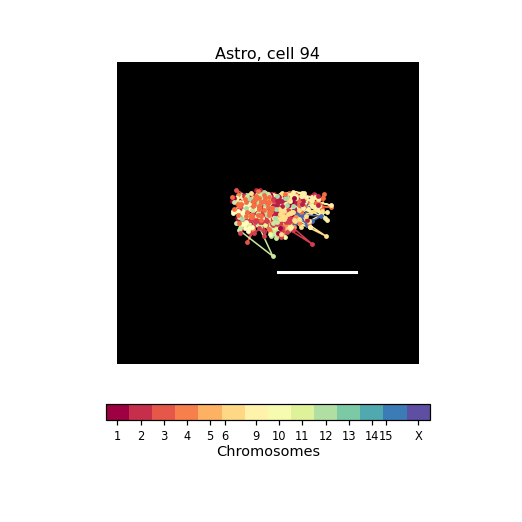

In [79]:
# select cell

#plt.style.use('dark_background')
plt.style.use('default')

_cell_type = 'Astro'
_cell_ind = 94

_dict = zxys_dict[_cell_type][_cell_ind]


from matplotlib import animation
plot_animation = False
angle = 3

_centered_dict = Centering_Chr2ZxysListDict(_dict)
plot_radius = 6

marker_size = 10
marker_alpha = 1
line_width = 1
depthshade=False
fig = plt.figure(figsize=(figure_width, figure_width), dpi=figure_dpi)
ax3d = fig.add_subplot(111, projection='3d')
ax3d.set_facecolor(background_color)
ax3d.set_axis_off()
ax3d.view_init(0,90)
# turn off grid if needed
ax3d.grid(False)
ax3d.xaxis.set_pane_color((0.0, 0.0, 0.0, 0.0))
ax3d.yaxis.set_pane_color((0.0, 0.0, 0.0, 0.0))
ax3d.zaxis.set_pane_color((0.0, 0.0, 0.0, 0.0))
# scatter plot
for _chr in sorted(_centered_dict.keys(), key = lambda v:sort_mouse_chr(v)):
    _zxys_list = _centered_dict[_chr]/1000
    for _zxys in _zxys_list:
        #print(_chr)
        _valid_inds = (np.isnan(_zxys).sum(1) == 0)
        _sc = ax3d.scatter(_zxys[_valid_inds,1], _zxys[_valid_inds,2], _zxys[_valid_inds,0],
                           color=chr_2_color[_chr], 
                           s=marker_size, depthshade=depthshade, 
                           alpha=marker_alpha,
                           #edgecolors=_edge_colors, 
                           linewidth=0, label=f"_chr")
        _ln = ax3d.plot(_zxys[_valid_inds,1], _zxys[_valid_inds,2], _zxys[_valid_inds,0],
                        color=chr_2_color[_chr], linewidth=line_width, alpha=marker_alpha)
# add reference_bar
_ref_bar_len = 5
_ref_bar_width=2
_ref_ln = ax3d.plot(
                    [-plot_radius*0.9+_ref_bar_len, -plot_radius*0.9],
                    [0,0],
                    [-plot_radius*0.9, -plot_radius*0.9], 
                    color=[1,1,1],
                    linewidth=_ref_bar_width,
                   )
# axes limits
ax3d.axes.set_xlim3d(left=-plot_radius, right=plot_radius) 
ax3d.axes.set_ylim3d(bottom=-plot_radius, top=plot_radius) 
ax3d.axes.set_zlim3d(bottom=-plot_radius, top=plot_radius) 
# axes ticks
ax3d.set_xticks(np.arange(-plot_radius,plot_radius+1, 2))
ax3d.set_yticks(np.arange(-plot_radius,plot_radius+1, 2))
ax3d.set_zticks(np.arange(-plot_radius,plot_radius+1, 2))
# axes labels
ax3d.set_xlabel(f"X (\u03BCm)", fontsize=_font_size+2, labelpad=1)
ax3d.set_ylabel(f"Y (\u03BCm)", fontsize=_font_size+2, labelpad=1)
ax3d.set_zlabel(f"Z (\u03BCm)", fontsize=_font_size+2, labelpad=1)
# title
ax3d.set_title(f"{_cell_type}, cell {_cell_ind}" ,fontsize=_font_size+3, pad=0)
# colorbar
bounds = [sort_mouse_chr(_chr) for _chr in _centered_dict.keys()]
bounds.append(np.max(bounds)+1)
bounds = np.sort(bounds)
norm = matplotlib.colors.BoundaryNorm(bounds, cmap.N)
cbar_shrink = 0.8
m = cm.ScalarMappable(cmap=cmap, norm=norm)
cbar = plt.colorbar(m, ax=ax3d, orientation='horizontal', pad=0.1, 
                    ticks=bounds[:-1]+0.5,
                    boundaries=bounds,
                    shrink=cbar_shrink)
cbar.set_label('Chromosomes', fontsize=_font_size+2, labelpad=1,)
cbar.ax.set_xticklabels(list(sorted(_dict.keys(), key = lambda v:sort_mouse_chr(v))), fontsize=_font_size)
# animation
if plot_animation:
    def rotate3D(angle):
         ax3d.view_init(azim=angle)

    ani = animation.FuncAnimation(fig, rotate3D, frames=np.arange(0, 360*2, angle), interval=50)
    ani.save(os.path.join(decoded_figure_folder, f"Decode3D_type_{_cell_type.replace(' ', '_').replace(r'/', '-')}_ind_{_cell_ind}_clear.gif"), 
             writer=animation.PillowWriter(fps=30))

# save pdf and png
fig.savefig(os.path.join(decoded_figure_folder, f"Decode3D_type_{_cell_type.replace(' ', '_').replace(r'/', '-')}_ind_{_cell_ind}_clear.pdf"),
            transparent=True)
fig.savefig(os.path.join(decoded_figure_folder, f"Decode3D_type_{_cell_type.replace(' ', '_').replace(r'/', '-')}_ind_{_cell_ind}_clear.png"),
            transparent=True)
fig.show()

<IPython.core.display.Javascript object>


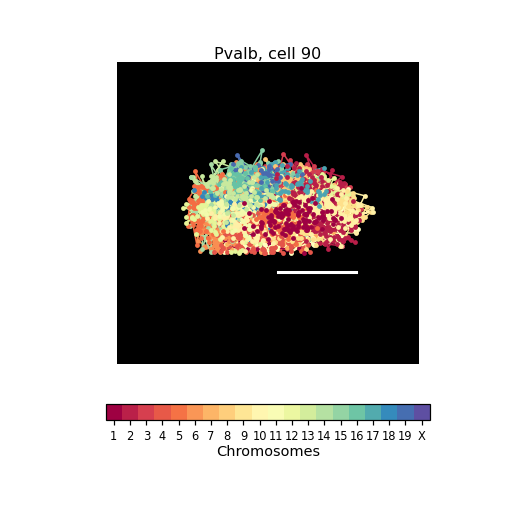

In [111]:
# select cell

#plt.style.use('dark_background')
plt.style.use('default')

_cell_type = 'Pvalb'
_cell_ind = 90

_dict = zxys_dict[_cell_type][_cell_ind]


from matplotlib import animation
plot_animation = False
save_plot = True

angle = 3

_centered_dict = Centering_Chr2ZxysListDict(_dict)
plot_radius = 6

marker_size = 10
marker_alpha = 1
line_width = 1
depthshade=False
fig = plt.figure(figsize=(figure_width, figure_width), dpi=figure_dpi)
ax3d = fig.add_subplot(111, projection='3d')
ax3d.set_facecolor(background_color)
ax3d.set_axis_off()
ax3d.view_init(0,90)
# turn off grid if needed
ax3d.grid(False)
ax3d.xaxis.set_pane_color((0.0, 0.0, 0.0, 0.0))
ax3d.yaxis.set_pane_color((0.0, 0.0, 0.0, 0.0))
ax3d.zaxis.set_pane_color((0.0, 0.0, 0.0, 0.0))
# scatter plot
for _chr in sorted(_centered_dict.keys(), key = lambda v:sort_mouse_chr(v)):
    _zxys_list = _centered_dict[_chr]/1000
    for _zxys in _zxys_list:
        #print(_chr)
        _valid_inds = (np.isnan(_zxys).sum(1) == 0)
        _sc = ax3d.scatter(_zxys[_valid_inds,1], _zxys[_valid_inds,2], _zxys[_valid_inds,0],
                           color=chr_2_color[_chr], 
                           s=marker_size, depthshade=depthshade, 
                           alpha=marker_alpha,
                           #edgecolors=_edge_colors, 
                           linewidth=0, label=f"_chr")
        _ln = ax3d.plot(_zxys[_valid_inds,1], _zxys[_valid_inds,2], _zxys[_valid_inds,0],
                        color=chr_2_color[_chr], linewidth=line_width, alpha=marker_alpha)
# add reference_bar
_ref_bar_len = 5
_ref_bar_width=2
_ref_ln = ax3d.plot(
                    [-plot_radius*0.9+_ref_bar_len, -plot_radius*0.9],
                    [0,0],
                    [-plot_radius*0.9, -plot_radius*0.9], 
                    color=[1,1,1],
                    linewidth=_ref_bar_width,
                   )
# axes limits
ax3d.axes.set_xlim3d(left=-plot_radius, right=plot_radius) 
ax3d.axes.set_ylim3d(bottom=-plot_radius, top=plot_radius) 
ax3d.axes.set_zlim3d(bottom=-plot_radius, top=plot_radius) 
# axes ticks
ax3d.set_xticks(np.arange(-plot_radius,plot_radius+1, 2))
ax3d.set_yticks(np.arange(-plot_radius,plot_radius+1, 2))
ax3d.set_zticks(np.arange(-plot_radius,plot_radius+1, 2))
# axes labels
ax3d.set_xlabel(f"X (\u03BCm)", fontsize=_font_size+2, labelpad=1)
ax3d.set_ylabel(f"Y (\u03BCm)", fontsize=_font_size+2, labelpad=1)
ax3d.set_zlabel(f"Z (\u03BCm)", fontsize=_font_size+2, labelpad=1)
# title
ax3d.set_title(f"{_cell_type}, cell {_cell_ind}" ,fontsize=_font_size+3, pad=0)
# colorbar
bounds = [sort_mouse_chr(_chr) for _chr in _centered_dict.keys()]
bounds.append(np.max(bounds)+1)
bounds = np.sort(bounds)
norm = matplotlib.colors.BoundaryNorm(bounds, cmap.N)
cbar_shrink = 0.8
m = cm.ScalarMappable(cmap=cmap, norm=norm)
cbar = plt.colorbar(m, ax=ax3d, orientation='horizontal', pad=0.1, 
                    ticks=bounds[:-1]+0.5,
                    boundaries=bounds,
                    shrink=cbar_shrink)
cbar.set_label('Chromosomes', fontsize=_font_size+2, labelpad=1,)
cbar.ax.set_xticklabels(list(sorted(_dict.keys(), key = lambda v:sort_mouse_chr(v))), fontsize=_font_size)
# animation
if plot_animation:
    def rotate3D(angle):
         ax3d.view_init(azim=angle)

    ani = animation.FuncAnimation(fig, rotate3D, frames=np.arange(0, 360*2, angle), interval=50)
    ani.save(os.path.join(decoded_figure_folder, f"Decode3D_type_{_cell_type.replace(' ', '_').replace(r'/', '-')}_ind_{_cell_ind}_clear.gif"), 
             writer=animation.PillowWriter(fps=30))
if save_plot:
    # save pdf and png
    fig.savefig(os.path.join(decoded_figure_folder, f"Decode3D_type_{_cell_type.replace(' ', '_').replace(r'/', '-')}_ind_{_cell_ind}_clear.pdf"),
                transparent=True)
    fig.savefig(os.path.join(decoded_figure_folder, f"Decode3D_type_{_cell_type.replace(' ', '_').replace(r'/', '-')}_ind_{_cell_ind}_clear.png"),
                transparent=True)
#fig.show()

<IPython.core.display.Javascript object>


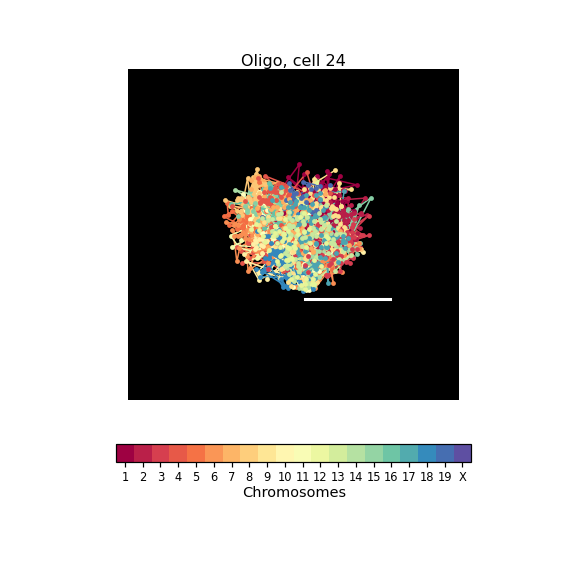

In [104]:
# select cell

#plt.style.use('dark_background')
plt.style.use('default')

_cell_type = 'Oligo'
_cell_ind = 24

_dict = zxys_dict[_cell_type][_cell_ind]


from matplotlib import animation
plot_animation = False
save_plot = True

angle = 3

_centered_dict = Centering_Chr2ZxysListDict(_dict)
plot_radius = 6

marker_size = 10
marker_alpha = 1
line_width = 1
depthshade=False
fig = plt.figure(figsize=(figure_width, figure_width), dpi=figure_dpi)
ax3d = fig.add_subplot(111, projection='3d')
ax3d.set_facecolor(background_color)
ax3d.set_axis_off()
ax3d.view_init(0,90)
# turn off grid if needed
ax3d.grid(False)
ax3d.xaxis.set_pane_color((0.0, 0.0, 0.0, 0.0))
ax3d.yaxis.set_pane_color((0.0, 0.0, 0.0, 0.0))
ax3d.zaxis.set_pane_color((0.0, 0.0, 0.0, 0.0))
# scatter plot
for _chr in sorted(_centered_dict.keys(), key = lambda v:sort_mouse_chr(v)):
    _zxys_list = _centered_dict[_chr]/1000
    for _zxys in _zxys_list:
        #print(_chr)
        _valid_inds = (np.isnan(_zxys).sum(1) == 0)
        _sc = ax3d.scatter(_zxys[_valid_inds,1], _zxys[_valid_inds,2], _zxys[_valid_inds,0],
                           color=chr_2_color[_chr], 
                           s=marker_size, depthshade=depthshade, 
                           alpha=marker_alpha,
                           #edgecolors=_edge_colors, 
                           linewidth=0, label=f"_chr")
        _ln = ax3d.plot(_zxys[_valid_inds,1], _zxys[_valid_inds,2], _zxys[_valid_inds,0],
                        color=chr_2_color[_chr], linewidth=line_width, alpha=marker_alpha)
# add reference_bar
_ref_bar_len = 5
_ref_bar_width=2
_ref_ln = ax3d.plot(
                    [-plot_radius*0.9+_ref_bar_len, -plot_radius*0.9],
                    [0,0],
                    [-plot_radius*0.9, -plot_radius*0.9], 
                    color=[1,1,1],
                    linewidth=_ref_bar_width,
                   )
# axes limits
ax3d.axes.set_xlim3d(left=-plot_radius, right=plot_radius) 
ax3d.axes.set_ylim3d(bottom=-plot_radius, top=plot_radius) 
ax3d.axes.set_zlim3d(bottom=-plot_radius, top=plot_radius) 
# axes ticks
ax3d.set_xticks(np.arange(-plot_radius,plot_radius+1, 2))
ax3d.set_yticks(np.arange(-plot_radius,plot_radius+1, 2))
ax3d.set_zticks(np.arange(-plot_radius,plot_radius+1, 2))
# axes labels
ax3d.set_xlabel(f"X (\u03BCm)", fontsize=_font_size+2, labelpad=1)
ax3d.set_ylabel(f"Y (\u03BCm)", fontsize=_font_size+2, labelpad=1)
ax3d.set_zlabel(f"Z (\u03BCm)", fontsize=_font_size+2, labelpad=1)
# title
ax3d.set_title(f"{_cell_type}, cell {_cell_ind}" ,fontsize=_font_size+3, pad=0)
# colorbar
bounds = [sort_mouse_chr(_chr) for _chr in _centered_dict.keys()]
bounds.append(np.max(bounds)+1)
bounds = np.sort(bounds)
norm = matplotlib.colors.BoundaryNorm(bounds, cmap.N)
cbar_shrink = 0.8
m = cm.ScalarMappable(cmap=cmap, norm=norm)
cbar = plt.colorbar(m, ax=ax3d, orientation='horizontal', pad=0.1, 
                    ticks=bounds[:-1]+0.5,
                    boundaries=bounds,
                    shrink=cbar_shrink)
cbar.set_label('Chromosomes', fontsize=_font_size+2, labelpad=1,)
cbar.ax.set_xticklabels(list(sorted(_dict.keys(), key = lambda v:sort_mouse_chr(v))), fontsize=_font_size)
# animation
if plot_animation:
    def rotate3D(angle):
         ax3d.view_init(azim=angle)

    ani = animation.FuncAnimation(fig, rotate3D, frames=np.arange(0, 360*2, angle), interval=50)
    ani.save(os.path.join(decoded_figure_folder, f"Decode3D_type_{_cell_type.replace(' ', '_').replace(r'/', '-')}_ind_{_cell_ind}_clear.gif"), 
             writer=animation.PillowWriter(fps=30))
if save_plot:
    # save pdf and png
    fig.savefig(os.path.join(decoded_figure_folder, f"Decode3D_type_{_cell_type.replace(' ', '_').replace(r'/', '-')}_ind_{_cell_ind}_clear.pdf"),
                transparent=True)
    fig.savefig(os.path.join(decoded_figure_folder, f"Decode3D_type_{_cell_type.replace(' ', '_').replace(r'/', '-')}_ind_{_cell_ind}_clear.png"),
                transparent=True)
#fig.show()

# Rotating gif

In [228]:


    #ax3d.

In [227]:
ax3d.azim

-60

In [238]:
np.arange(0, 360*2, angle).shape

(72,)